# Neural Networks from Scratch

## Iris Dataset


#### Data Loading and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('iris')
print(data.head())
data.species.value_counts()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

There are 3 categories in this dataset. For now lets make it a binary classification task: for labels "setosa", set value as 1 otherwise 0

In [3]:
data['species'] = [1 if label == 'setosa' else 0 for label in data['species']]
data.species.value_counts()

species
0    100
1     50
Name: count, dtype: int64

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


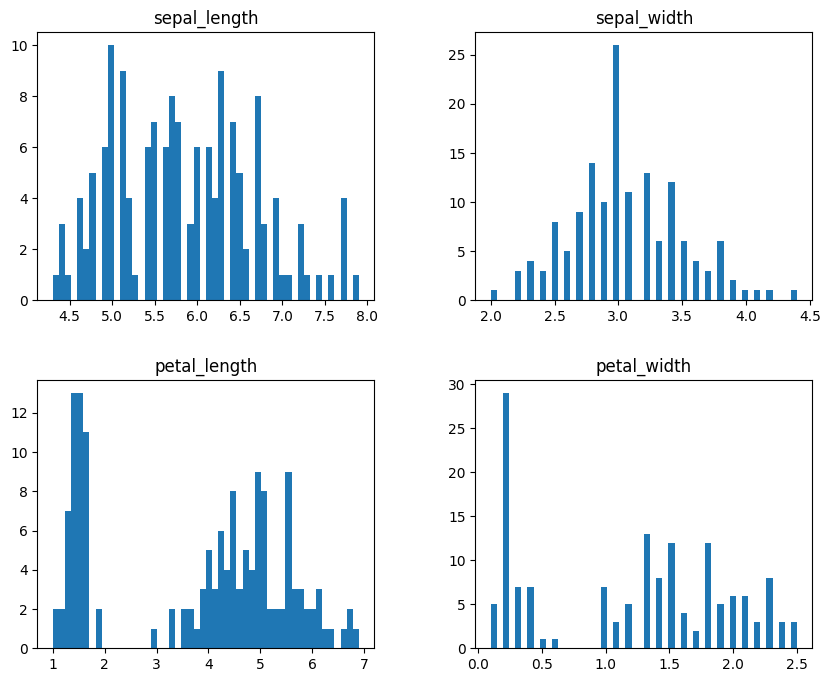

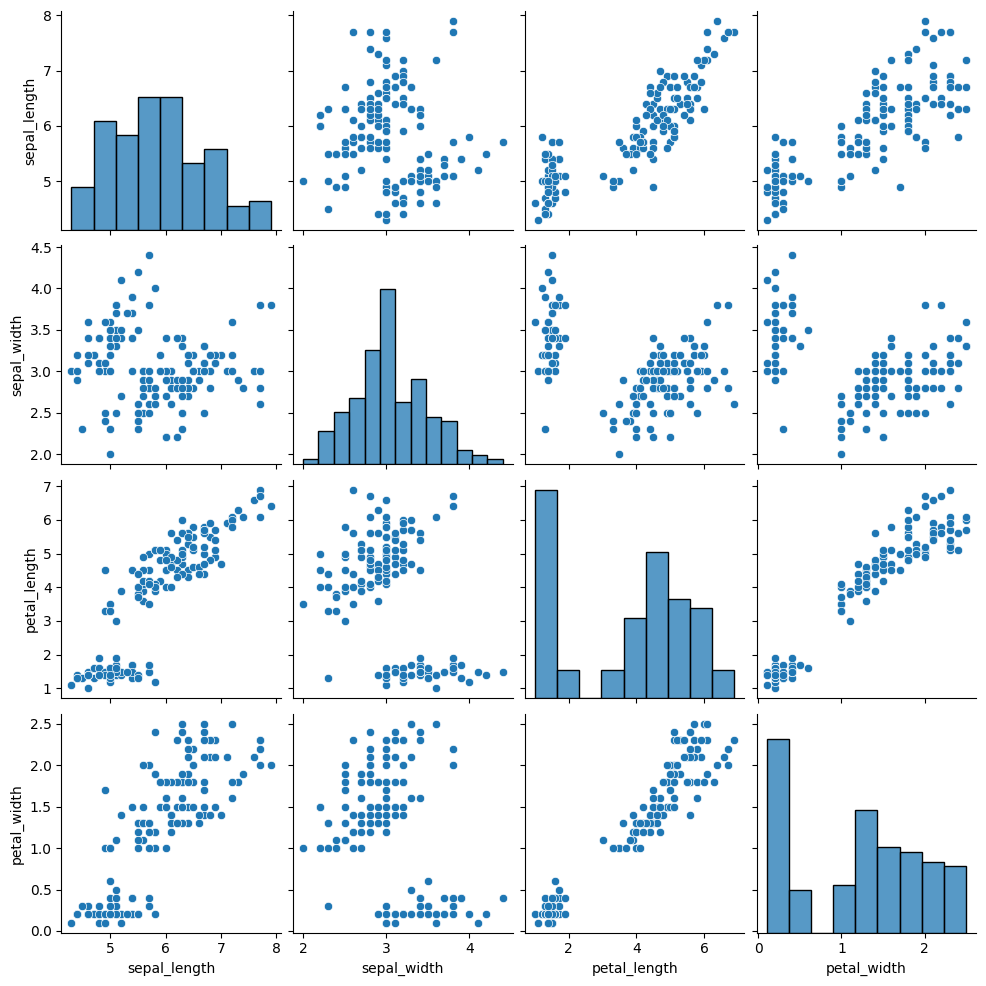

In [4]:
x = data.drop(columns = ['species'], axis =1)
print(x.head())
x.hist(bins = 50, figsize=(10, 8), grid=False)
sns.pairplot(x)

In [5]:
print(x.shape)
y = data['species']
print(y.shape)

(150, 4)
(150,)


We want to fit 2 layers(1 hidden + 1 output) with 3 and 1 neuron. Input matrix shape is [150,4]. First layer weights vector will be of shape[4,3].
The output layer will have the shape [150,1]. Since we want to keep some data for testing, lets use only 100 data points.

#### Summary

| Layer           | Input Shape  | Weight Shape | Bias Shape | Pre-activation                | Activation | Output Shape |
|-----------------|--------------|--------------|------------|-------------------------------|------------|--------------|
| **Input**       | —            | —            | —          | —                             | —          | (105, 4)     |
| **Hidden 1**    | (105, 4)     | (4, 3)       | (1, 3)     | (105, 4)·(4, 3) + (1, 3) → (105, 3) | ReLU       | (105, 3)     |
| **Output**      | (105, 3)     | (3, 1)       | (1, 1)     | (105, 3)·(3, 1) + (1, 1) → (105, 1) | Sigmoid    | (100, 1)     |


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


In [7]:
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))    

The next step involves initializing weights and bias to random values, the algorithm will calculate the best fit,and the RELU function ensures non linearity by setting negetive values as 0

The forward method is being used to calculate the intermediate variables while the backward method finds ways to reduce cross entropy loss.

In [8]:
np.random.seed(42)
w1 = np.random.randn(4,3)*0.01
b1 = np.zeros((1,3))

w2 = np.random.randn(3,1)*0.01
b2 = np.zeros((1,1))

In [9]:
def forward(x, w1, b1, w2, b2):
    Z1 = np.dot(x,w1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, w2) + b2
    A2 = sigmoid(Z2)

    cache = (x, Z1, A1, Z2, A2)
    return A2, cache

def loss_func(A2, y):
    m = y.shape[0]
    eps = 1e-8 #to avoid log 0 if A2 == 0

    loss = -(1/m)*np.sum(y*np.log(A2+eps)+(1-y)*np.log((1-A2)+eps))
    return loss

def backward(cache, W2, Y):
    
    m = Y.shape[0]
    X,Z1,A1,Z2,A2 = cache

    dZ2 = A2-Y
    dW2 = (A1.T @ dZ2/m)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  

    dA1 = dZ2 @ W2.T
    dZ1 = dA1*relu_derivative(Z1)
    dW1 = (X.T @ dZ1/m)
    db1 = np.sum(dZ1, axis = 0, keepdims = True)/m

    return dW1, db1, dW2, db2



In [10]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

#### Model Training

This step outlines the training of the model.  
The architecture was explained above.  
We have already defined the `forward` and `backward` functions, along with the activation functions.

The training loop runs for a pre-defined number of epochs and uses a fixed learning rate.  
In each iteration:

- A **forward pass** computes activations through all layers.
- A **backward pass** computes gradients to minimize the loss function.

As a result, the parameters  
$\theta = \{ W_1, b_1, W_2, b_2 \}$  
are updated each iteration using gradient descent, gradually moving toward values that minimize the training loss.


In [ ]:
learning_rate = 0.001
n_epochs = 10000


y_train = y_train.reshape(-1, 1)   # now (105, 1)
y_test  = y_test.reshape(-1, 1)

losses = []
for epoch in range(n_epochs+1):
    A2, cache = forward(x_train, w1, b1, w2, b2)
    
    loss = loss_func(A2, y_train)
    losses.append(loss)
    
    dW1, db1_grad, dW2, db2_grad = backward(cache, w2, y_train)

    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1_grad
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2_grad

    if (epoch % 50 == 0 or epoch == 1):
        print(epoch)
print(w1.shape,b1.shape,w2.shape,b2.shape)

0
1
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
(4, 3) (1, 3) (3, 1) (1, 1)


#### Test Evaluation

In [12]:
print(x_test.shape)

(45, 4)


In [13]:
Z1_test = np.dot(x_test ,w1) + b1
A1_test = relu(Z1_test)

print(A1_test.shape)

Z2_test = np.dot(A1_test, w2)+b2
A2_test = sigmoid(Z2_test)

y_hat = np.where(A2_test>0.6, 1, 0)
print(y_hat)

(45, 3)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_hat, y_test))

0.5777777777777777


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_pred, y_test))


1.0


C:\Users\rwadk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Data Exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df = df.drop(['id'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df['diagnosis'] = [1 if label == 'M' else 0 for label in df['diagnosis']]

In [22]:
X = df.drop(['diagnosis'], axis = 1)
Y = df['diagnosis']

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

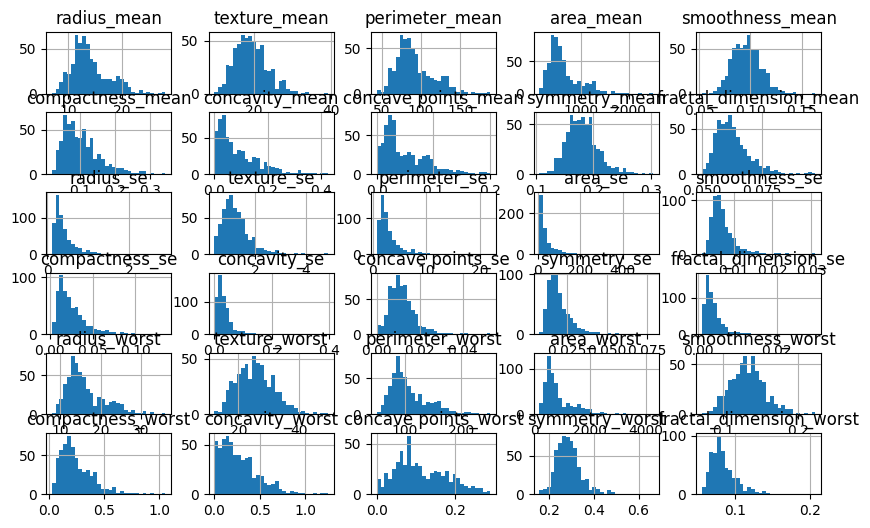

In [23]:

X.hist(figsize=(10,6), bins = 30)

<Axes: >

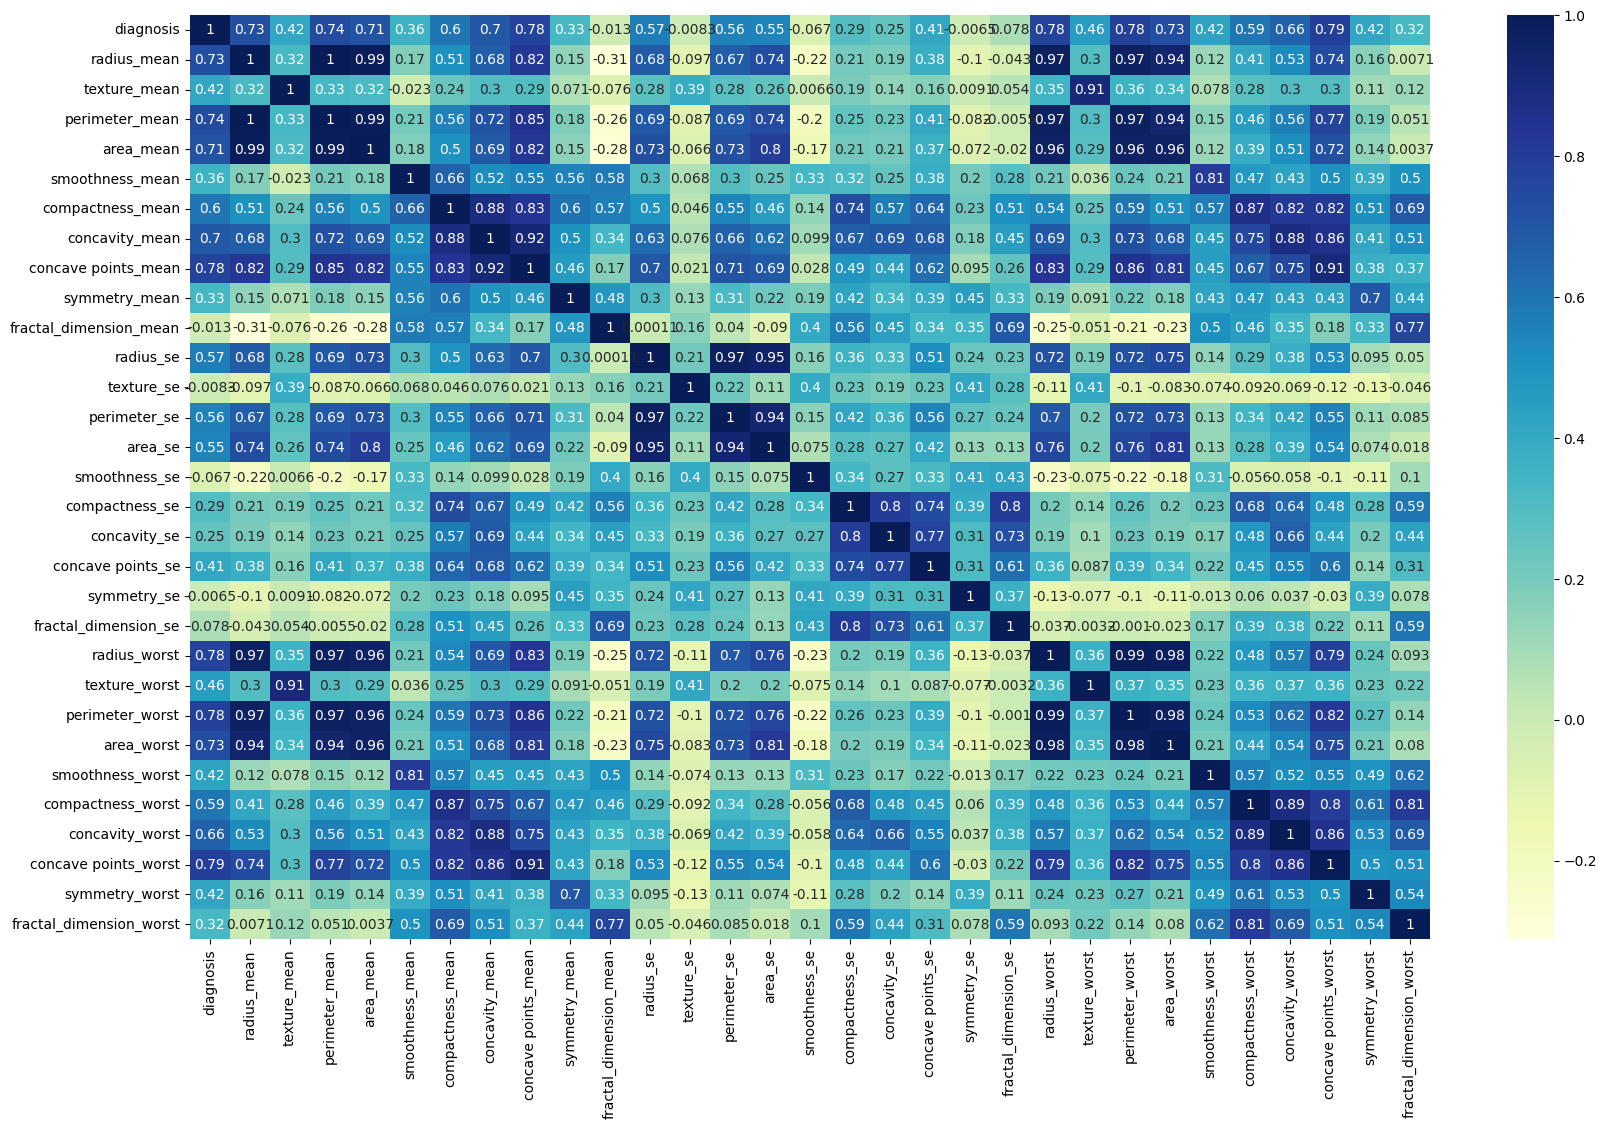

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")

#### Selecting the Architecture

The input consists of 30 features, and the output is a probability value between 0 and 1, so the final activation function is sigmoid (suitable for binary classification).

We select the following architecture:

**30 inputs → 16 neurons → 8 neurons → 1 output**

- The hidden layers use the ReLU activation function to introduce non-linearity.
- The output layer uses the sigmoid function to generate a probability score.

This architecture is simple yet expressive enough to capture patterns in the data. We avoid excessive complexity to reduce the risk of overfitting while still enabling the model to learn non-linear relationships.

| Layer             | Shape                        | Description                            |
|------------------|------------------------------|----------------------------------------|
| Input            | (n_samples, **30**)          | 30 features per sample                 |
| Weights W1       | (**30**, 16)                 | 30 inputs → 16 hidden neurons          |
| Bias b1          | (1, **16**)                  | One bias per hidden neuron             |
| Hidden Layer 1   | (n_samples, **16**)          | Output after ReLU                      |
| Weights W2       | (**16**, 8)                  | 16 → 8 hidden neurons                  |
| Bias b2          | (1, **8**)                   | One bias per neuron                    |
| Hidden Layer 2   | (n_samples, **8**)           | Output after ReLU                      |
| Weights W3       | (**8**, 1)                   | 8 → 1 output neuron                    |
| Bias b3          | (1, **1**)                   | Bias for output neuron                 |
| Output Layer     | (n_samples, **1**)           | Final probability (after sigmoid)      |

---


In [25]:
w1 = np.random.randn(30,16)*0.01
b1 = np.zeros((1,16))

w2 = np.random.randn(16,8)*0.01
b2 = np.zeros((1,8))

w3 = np.random.randn(8,1)*0.01
b3 = np.zeros((1,1))

In [26]:
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [27]:
def forward(X, w1, b1, w2, b2, w3, b3):
    Z1 = np.dot(X, w1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, w2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2,w3)+b3
    A3 = sigmoid(Z3)

    arr = (X, Z1, A1, Z2, A2, Z3, A3)
    return A3, arr
def calc_loss(A3,Y):
    m = Y.shape[0]
    eps = 1e-8  
    loss = -(1/m)*np.sum(Y*np.log(A3+eps)+(1-Y)*np.log((1-A3)+eps))
    return loss

def backward(arr, w2, w3, Y):
    m = Y.shape[0]
    X, Z1, A1, Z2, A2, Z3, A3 = arr

    dZ3 = A3 - Y
    dW3 = (A2.T @ dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = dZ3 @ w3.T
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m    
    
    dA1 = dZ2 @ w2.T 
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (X.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3



In [28]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train = x_train.values

y_train = y_train.values
y_train = y_train.reshape(-1, 1)   # now (398, 1)
x_test = x_test.values
y_test = y_test.values
y_test = y_test.reshape(-1, 1)      # now (171, 1)


In [29]:
n_epochs = 10000
learning_rate = 0.01
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

for epoch in range(n_epochs+1):
    A3, arr = forward(x_train, w1, b1, w2, b2, w3, b3)
    loss = calc_loss(A3, y_train)
    dW1, db1, dW2, db2, dW3, db3 = backward(arr, w2, w3, y_train)
    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    w3 -= learning_rate * dW3
    b3 -= learning_rate * db3

#### Predictions

In [30]:
Z1 = np.dot(x_test, w1)+b1
A1 = relu(Z1)

Z2 = np.dot(A1,w2)+b2
A2 = relu(Z2)

Z3 = np.dot(A2,w3)+b3
A3 = sigmoid(Z3)

predictions = np.where(A3>0.5, 1, 0)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test))

0.9941520467836257


In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)
print(accuracy_score(lr_preds,y_test))

0.9824561403508771


C:\Users\rwadk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
